In [2]:
!pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [4]:
import sys
sys.path.insert(0,'C:/Users/jugat/Documents/a_JUGATX/FORMACION/DATA SCIENCE/Functions')

from fx_OUTLIERS import *
from functions_plot_EDA import *
from Functions_ML_classification import *
from fx_MLClassification import *

# Importing 2018 and 2019 finances previously cleaned in MalaSW_05 notebook

In [5]:
df_2018 = pd.read_csv('../datasets/Estados Financieros/df_anual_2018.csv', index_col=0)
df_2019 = pd.read_csv('../datasets/Estados Financieros/df_anual_2019.csv', index_col=0)

In [6]:
df_2018.head(2)

,,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
2,Ventas Mayoreo,10407.0,0.0,34880.0,0.0,34831.84,0.0,28960.0,0.0,10140.0,30735.0,12729.0,35154.0
3,Ventas Menudeo,9090.0,18330.0,59392.0,6440.0,28984.00,23026.0,38051.0,40818.3,31087.0,33401.0,28640.0,42494.0


In [7]:
df_2019.head(2)

,Unnamed: 0.1,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Acumulado
2,Ventas Mayoreo,13448.0,6910.0,11076.0,17802.0,14552.0,7014.0,17596.0,34329.0,15525.0,138251.0
3,Ventas Menudeo,23970.0,25019.0,33379.0,63307.0,9929.0,14276.0,49947.0,15002.0,15672.0,250501.0


In [8]:
df_2019 = df_2019.drop(['Acumulado'], axis = 1)

In [9]:
df_2018 = df_2018.set_index(' ')
df_2019 = df_2019.set_index('Unnamed: 0.1')

In [10]:
df_2018.head(2)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
,,,,,,,,,,,,
Ventas Mayoreo,10407.0,0.0,34880.0,0.0,34831.84,0.0,28960.0,0.0,10140.0,30735.0,12729.0,35154.0
Ventas Menudeo,9090.0,18330.0,59392.0,6440.0,28984.00,23026.0,38051.0,40818.3,31087.0,33401.0,28640.0,42494.0


In [11]:
df_2018.columns

Index(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [12]:
#Dropping October, November and December months for comparisson with 2019 where they are not available
df_2018_drop = df_2018.drop(['Octubre', 'Noviembre', 'Diciembre'], axis = 1)

In [13]:
df_2019.head(2)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre
Unnamed: 0.1,,,,,,,,,
Ventas Mayoreo,13448.0,6910.0,11076.0,17802.0,14552.0,7014.0,17596.0,34329.0,15525.0
Ventas Menudeo,23970.0,25019.0,33379.0,63307.0,9929.0,14276.0,49947.0,15002.0,15672.0


In [14]:
#df_2018 = df_2018.add_suffix('_2018')
#df_2019 = df_2019.add_suffix('_2019')

In [15]:
df_2018.head(2)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
,,,,,,,,,,,,
Ventas Mayoreo,10407.0,0.0,34880.0,0.0,34831.84,0.0,28960.0,0.0,10140.0,30735.0,12729.0,35154.0
Ventas Menudeo,9090.0,18330.0,59392.0,6440.0,28984.00,23026.0,38051.0,40818.3,31087.0,33401.0,28640.0,42494.0


In [16]:
#Using transpose for datasets
df_2018_T = df_2018_drop.T
df_2019_T = df_2019.T

In [17]:
df_2018_T

,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,Maquila,...,Mantto de Vehículos,Impuestos derechos locales,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA
Enero,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,7259.0,...,0.0,0.0,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333
Febrero,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,3900.0,...,0.0,0.0,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667
Marzo,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,4731.0,...,0.0,0.0,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667
Abril,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,0.0,...,0.0,0.0,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000
Mayo,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,2812.0,...,0.0,0.0,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333
Junio,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,700.0,...,0.0,0.0,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333
Julio,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,2000.0,...,0.0,0.0,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333
Agosto,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,1966.0,...,0.0,0.0,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667
Septiembre,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,924.0,...,0.0,0.0,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667


In [18]:
#Adding year before concatenating datasets
df_2019_T['AÑO']= '2019'

In [19]:
df_2018_T['AÑO']= '2018'

In [20]:
df_2018_T

,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,Maquila,...,Impuestos derechos locales,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO
Enero,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,7259.0,...,0.0,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018
Febrero,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,3900.0,...,0.0,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018
Marzo,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,4731.0,...,0.0,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667,2018
Abril,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,0.0,...,0.0,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018
Mayo,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,2812.0,...,0.0,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018
Junio,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,700.0,...,0.0,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018
Julio,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,2000.0,...,0.0,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018
Agosto,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,1966.0,...,0.0,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018
Septiembre,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,924.0,...,0.0,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018


In [21]:
#Concatenating 2018 and 2019 datasets
df_total = pd.concat([df_2018_T, df_2019_T], axis = 0)
df_total

,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,Maquila,...,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO,Vitta Colombiana,Forro,Etiquetas y Embalajes,Renta de Máquinas
Enero,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,7259.0,...,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018,NaN,NaN,NaN,NaN
Febrero,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,3900.0,...,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018,NaN,NaN,NaN,NaN
Marzo,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,4731.0,...,409.166667,360.00,0.000000,31460.733333,30670.416667,2018,NaN,NaN,NaN,NaN
Abril,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,0.0,...,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018,NaN,NaN,NaN,NaN
Mayo,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,2812.0,...,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018,NaN,NaN,NaN,NaN
Junio,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,700.0,...,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018,NaN,NaN,NaN,NaN
Julio,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,2000.0,...,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018,NaN,NaN,NaN,NaN
Agosto,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,1966.0,...,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018,NaN,NaN,NaN,NaN
Septiembre,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,924.0,...,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018,NaN,NaN,NaN,NaN
Enero,13448.00,23970.0,0.0,16048.00,9866.0,1889.0,65220.00,0.00,187.00,0.0,...,1041.000000,200.00,1037.000000,35221.000000,2668.000000,2019,6861.0,1050.0,1649.0,0.0


In [22]:
df_total = df_total.dropna(axis = 1)

In [23]:
df_total

,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,Maquila,...,Impuestos derechos locales,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO
Enero,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,7259.0,...,0.0,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018
Febrero,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,3900.0,...,0.0,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018
Marzo,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,4731.0,...,0.0,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667,2018
Abril,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,0.0,...,0.0,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018
Mayo,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,2812.0,...,0.0,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018
Junio,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,700.0,...,0.0,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018
Julio,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,2000.0,...,0.0,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018
Agosto,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,1966.0,...,0.0,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018
Septiembre,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,924.0,...,0.0,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018
Enero,13448.00,23970.0,0.0,16048.00,9866.0,1889.0,65220.00,0.00,187.00,0.0,...,0.0,2479.00,1314.000000,2857.00,1041.000000,200.00,1037.000000,35221.000000,2668.000000,2019


In [24]:
df_total = df_total.reset_index()
df_total.rename(columns={'index': 'Month'}, inplace = True)
df_total

,Month,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,...,Impuestos derechos locales,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO
0,Enero,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,...,0.0,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018
1,Febrero,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,...,0.0,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018
2,Marzo,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,...,0.0,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667,2018
3,Abril,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,...,0.0,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018
4,Mayo,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,...,0.0,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018
5,Junio,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,...,0.0,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018
6,Julio,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,...,0.0,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018
7,Agosto,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,...,0.0,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018
8,Septiembre,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,...,0.0,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018
9,Enero,13448.00,23970.0,0.0,16048.00,9866.0,1889.0,65220.00,0.00,187.00,...,0.0,2479.00,1314.000000,2857.00,1041.000000,200.00,1037.000000,35221.000000,2668.000000,2019


In [25]:
df_total.columns

Index(['Month', 'Ventas Mayoreo', 'Ventas Menudeo', 'Ventas Ferias de Diseño',
       'Ventas Consignación', 'Ventas en línea', 'Otros Ingresos',
       'TOTAL  VENTAS NETAS', 'Materia Prima', 'Material de Empaque',
       'Maquila', 'Insumos', 'Patrones', 'Sueldos Producción',
       'TOTAL COSTO DE VENTA', 'RESULTADO BRUTO', 'Renta de Inmuebles',
       'Sueldos Adminstrativos', 'Servicios Energía & Agua', 'Telefonía',
       'Servicios de Internet', 'Papelería', 'Matto Inmuebles',
       'Publicidad & Anuncios', 'Cuotas Ferias de Diseño',
       'Gastos de Alimentos', 'Gastos de Transporte',
       'Suministros de despensa', 'Fotografía/Producciones',
       'Seguros & Fianzas', 'Gastos de viaje', 'Gastos de Limpieza',
       'Gasolina', 'Mobiliario y Equipo Menor', 'Mantto de Vehículos',
       'Impuestos derechos locales', 'Gastos de Envío', 'Bonos',
       'Comisiones y Recargos', 'Herraminetas Menores y Utensilios',
       'Mantto Herramienta y Utensilios', 'Maquinas y Equipo In

In [26]:
df_total.to_excel('Finances.xlsx')

# Plotting concepts per year

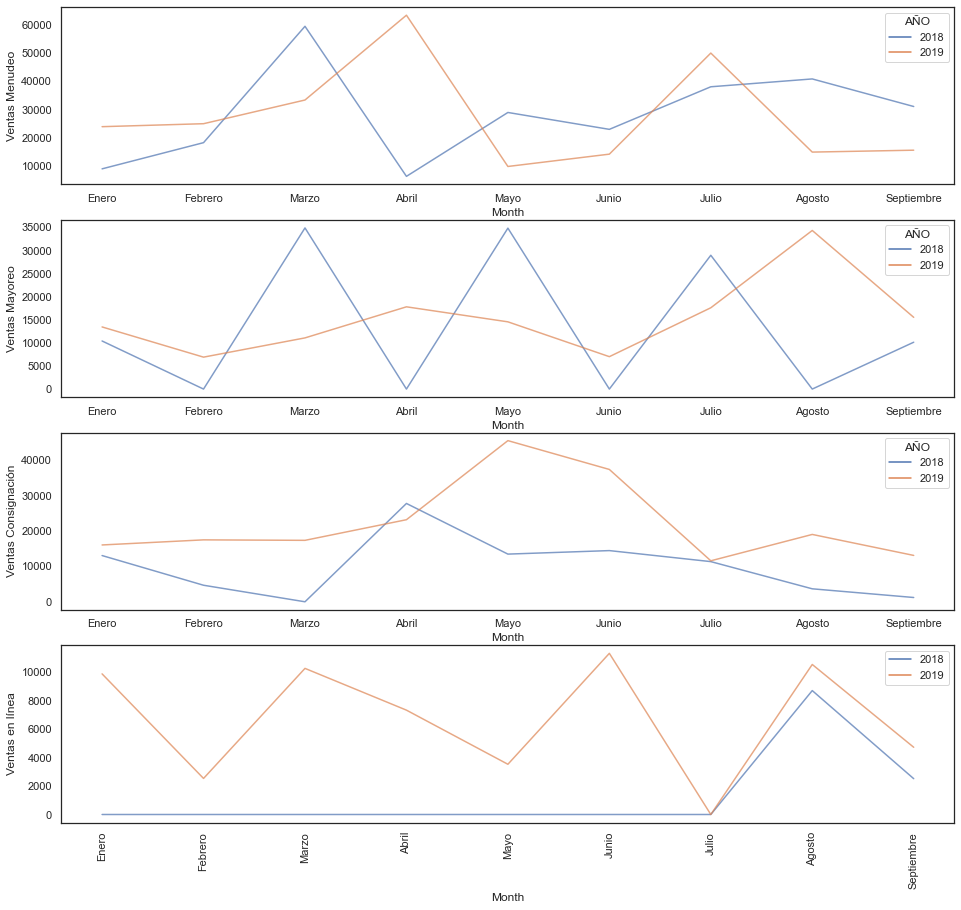

In [27]:
fig, ax = plt.subplots(4,1,figsize=(16, 15))
sns.set_theme(style="whitegrid")

sns.lineplot(x="Month", y="Ventas Menudeo", data=df_total, hue='AÑO', alpha=0.7, ax=ax[0])
                 


sns.lineplot(x="Month", y="Ventas Mayoreo", data=df_total, hue='AÑO', alpha=0.7, ax=ax[1])

sns.lineplot(x="Month", y="Ventas Consignación", data=df_total, hue='AÑO', alpha=0.7, ax=ax[2])

sns.lineplot(x="Month", y="Ventas en línea", data=df_total, hue='AÑO', alpha=0.7, ax=ax[3])

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

# Preparing data for further plots

In [28]:
#Groupby YEAR
df_globals = df_total.groupby('AÑO').sum()
df_globals.columns

Index(['Ventas Mayoreo', 'Ventas Menudeo', 'Ventas Ferias de Diseño',
       'Ventas Consignación', 'Ventas en línea', 'Otros Ingresos',
       'TOTAL  VENTAS NETAS', 'Materia Prima', 'Material de Empaque',
       'Maquila', 'Insumos', 'Patrones', 'Sueldos Producción',
       'TOTAL COSTO DE VENTA', 'RESULTADO BRUTO', 'Renta de Inmuebles',
       'Sueldos Adminstrativos', 'Servicios Energía & Agua', 'Telefonía',
       'Servicios de Internet', 'Papelería', 'Matto Inmuebles',
       'Publicidad & Anuncios', 'Cuotas Ferias de Diseño',
       'Gastos de Alimentos', 'Gastos de Transporte',
       'Suministros de despensa', 'Fotografía/Producciones',
       'Seguros & Fianzas', 'Gastos de viaje', 'Gastos de Limpieza',
       'Gasolina', 'Mobiliario y Equipo Menor', 'Mantto de Vehículos',
       'Impuestos derechos locales', 'Gastos de Envío', 'Bonos',
       'Comisiones y Recargos', 'Herraminetas Menores y Utensilios',
       'Mantto Herramienta y Utensilios', 'Maquinas y Equipo Industrial'

In [29]:
df_globals

,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,Maquila,...,Mantto de Vehículos,Impuestos derechos locales,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA
AÑO,,,,,,,,,,,,,,,,,,,,,
2018,119218.84,255218.3,74672.5,89628.01,11205.5,13130.0,563073.15,109156.64,4243.45,24292.0,...,0.0,0.0,13608.14,9262.5,9082.46,4481.003333,5272.22,5729.383333,304981.986667,-11613.056667
2019,138252.00,250501.0,95047.0,200637.00,60039.0,1889.0,746363.00,55579.00,1370.00,0.0,...,0.0,0.0,12355.00,11826.0,17485.00,2584.000000,1350.00,9333.000000,436086.000000,-5725.000000


In [30]:
#Filtering columns for plot
cols_plot = ['TOTAL  VENTAS NETAS','TOTAL COSTO DE VENTA', 'RESULTADO BRUTO', 'TOTAL GASTOS OPERATIVOS','UTILIDAD O PÉRDIDA']
df_filtered = df_globals[cols_plot]
df_filtered

,TOTAL VENTAS NETAS,TOTAL COSTO DE VENTA,RESULTADO BRUTO,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA
AÑO,,,,,
2018,563073.15,269704.22,293368.93,304981.986667,-11613.056667
2019,746363.00,316001.00,430361.00,436086.000000,-5725.000000


In [31]:
#Reset index melting by YEAR
df_filtered = df_filtered.reset_index().melt('AÑO', var_name='colum_names',  value_name='total')
df_filtered

,AÑO,colum_names,total
0,2018,TOTAL VENTAS NETAS,563073.150000
1,2019,TOTAL VENTAS NETAS,746363.000000
2,2018,TOTAL COSTO DE VENTA,269704.220000
3,2019,TOTAL COSTO DE VENTA,316001.000000
4,2018,RESULTADO BRUTO,293368.930000
5,2019,RESULTADO BRUTO,430361.000000
6,2018,TOTAL GASTOS OPERATIVOS,304981.986667
7,2019,TOTAL GASTOS OPERATIVOS,436086.000000
8,2018,UTILIDAD O PÉRDIDA,-11613.056667
9,2019,UTILIDAD O PÉRDIDA,-5725.000000


In [32]:
#Saving csv file
df_filtered.to_csv('Comparison.csv')

 # Plotting P&L 2018 and 2019

In [33]:
df_filtered.columns

Index(['AÑO', 'colum_names', 'total'], dtype='object')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TOTAL  VENTAS NETAS'),
  Text(1, 0, 'TOTAL COSTO DE VENTA'),
  Text(2, 0, 'RESULTADO BRUTO'),
  Text(3, 0, 'TOTAL GASTOS OPERATIVOS'),
  Text(4, 0, 'UTILIDAD O PÉRDIDA')])

<Figure size 1152x864 with 0 Axes>

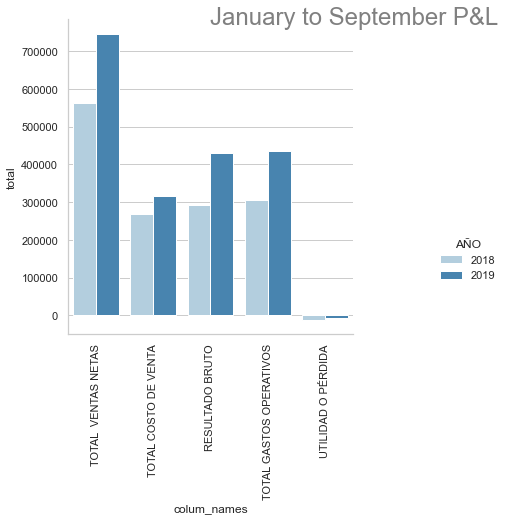

In [34]:
#Plotting P&L for 2018 and 2019

fig = plt.figure(figsize=(16,12))
#sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.catplot(x="colum_names", y="total", hue='AÑO', data=df_filtered, kind='bar', palette = 'Blues')
plt.suptitle('January to September P&L',fontsize=24,ha='left',va='top',color='#808080', y=1)
#plt.xlabel=  None
#plt.ylabel("MXC Pesos")
plt.xticks(rotation=90)

In [35]:
#Testing different libraries for visualisations

#Plotting P&L for 2018 and 2019

colors_2014 = ['azure', 'greys', 'ice']
fig = px.bar(df_filtered, x = "colum_names", 
                 y = "total", 
                 color='AÑO' )

fig.update_layout(barmode='group')

# hide and lock down axes
#fig.update_yaxes(visible=False, fixedrange=True)

fig.update_layout()

fig.show()

# Analysing operations costs from df_globals

In [37]:
cols_plot_ops = ['Renta de Inmuebles',
       'Sueldos Adminstrativos', 'Servicios Energía & Agua', 'Telefonía',
       'Servicios de Internet', 'Papelería', 'Matto Inmuebles',
       'Publicidad & Anuncios', 'Cuotas Ferias de Diseño',
       'Gastos de Alimentos', 'Gastos de Transporte',
       'Suministros de despensa', 'Fotografía/Producciones',
       'Seguros & Fianzas', 'Gastos de viaje', 'Gastos de Limpieza',
       'Gasolina', 'Mobiliario y Equipo Menor', 'Mantto de Vehículos',
       'Impuestos derechos locales', 'Gastos de Envío', 'Bonos',
       'Comisiones y Recargos', 'Herraminetas Menores y Utensilios',
       'Mantto Herramienta y Utensilios', 'Maquinas y Equipo Industrial']
df_filtered_ops = df_globals[cols_plot_ops]
df_filtered_ops

,Renta de Inmuebles,Sueldos Adminstrativos,Servicios Energía & Agua,Telefonía,Servicios de Internet,Papelería,Matto Inmuebles,Publicidad & Anuncios,Cuotas Ferias de Diseño,Gastos de Alimentos,...,Gasolina,Mobiliario y Equipo Menor,Mantto de Vehículos,Impuestos derechos locales,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial
AÑO,,,,,,,,,,,,,,,,,,,,,
2018,37633.0,119445.4,3236.0,2520.0,2283.0,1319.43,1123.0,12180.0,25419.0,2364.0,...,15512.64,0.0,0.0,0.0,13608.14,9262.5,9082.46,4481.003333,5272.22,5729.383333
2019,57420.0,198616.0,4050.0,1416.0,0.0,2089.00,0.0,4199.0,49562.0,1089.0,...,6961.00,4395.0,0.0,0.0,12355.00,11826.0,17485.00,2584.000000,1350.00,9333.000000


In [38]:
df_filtered_ops = df_filtered_ops.reset_index().melt('AÑO', var_name='colum_names',  value_name='total')
df_filtered_ops

,AÑO,colum_names,total
0,2018,Renta de Inmuebles,37633.000000
1,2019,Renta de Inmuebles,57420.000000
2,2018,Sueldos Adminstrativos,119445.400000
3,2019,Sueldos Adminstrativos,198616.000000
4,2018,Servicios Energía & Agua,3236.000000
5,2019,Servicios Energía & Agua,4050.000000
6,2018,Telefonía,2520.000000
7,2019,Telefonía,1416.000000
8,2018,Servicios de Internet,2283.000000
9,2019,Servicios de Internet,0.000000


In [39]:
df_filtered_ops.to_csv('filtered_ops.csv')

<Figure size 2880x144 with 0 Axes>

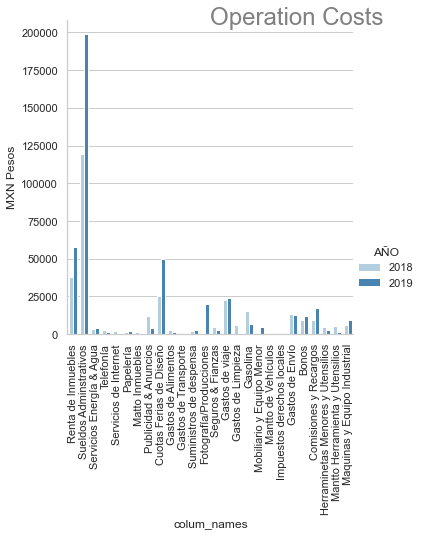

In [40]:
fig= plt.figure(figsize=(40,2))
#sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.catplot(x="colum_names", y="total", hue='AÑO', data=df_filtered_ops, kind='bar', palette = 'Blues')
plt.suptitle('Operation Costs',fontsize=24,ha='left',va='top',color='#808080', y=1)
#plt.xlabel ("Concepto")
plt.ylabel("MXN Pesos")
plt.xticks(rotation=90)


plt.show()
fig.savefig('Ops_costs.png',bbox_inches="tight")



# Marketing Campaigns and their impact on sales

In [41]:
#Creating dataframes with suffix to evaluate marketing campaign impact
df_2018_ = df_2018.add_suffix('-2018')
df_2019_ = df_2019.add_suffix('-2019')

In [42]:
df_2018_T_ = df_2018_.T
df_2019_T_ = df_2019_.T

In [43]:
df_2018_T_['AÑO']= '2018'
df_2019_T_['AÑO']= '2019'

In [44]:
df_total_ = pd.concat([df_2018_T_, df_2019_T_], axis = 0)
df_total_ = df_total_.dropna(axis = 1)
df_total_ = df_total_.reset_index()
df_total_.rename(columns={'index': 'Month'}, inplace = True)
df_total_

,Month,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,...,Impuestos derechos locales,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO
0,Enero-2018,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,...,0.0,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018
1,Febrero-2018,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,...,0.0,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018
2,Marzo-2018,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,...,0.0,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667,2018
3,Abril-2018,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,...,0.0,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018
4,Mayo-2018,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,...,0.0,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018
5,Junio-2018,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,...,0.0,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018
6,Julio-2018,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,...,0.0,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018
7,Agosto-2018,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,...,0.0,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018
8,Septiembre-2018,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,...,0.0,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018
9,Octubre-2018,30735.00,33401.0,0.0,10623.00,3749.0,162.0,78670.00,6791.00,0.00,...,0.0,4119.00,1029.166667,219.00,29.000000,0.00,1036.910000,37194.076667,15584.923333,2018


In [45]:
months = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9]
df_total_['Month_num']= months

In [46]:
df_total_

,Month,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,...,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO,Month_num
0,Enero-2018,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,...,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018,1
1,Febrero-2018,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,...,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018,2
2,Marzo-2018,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,...,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667,2018,3
3,Abril-2018,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,...,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018,4
4,Mayo-2018,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,...,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018,5
5,Junio-2018,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,...,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018,6
6,Julio-2018,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,...,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018,7
7,Agosto-2018,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,...,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018,8
8,Septiembre-2018,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,...,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018,9
9,Octubre-2018,30735.00,33401.0,0.0,10623.00,3749.0,162.0,78670.00,6791.00,0.00,...,4119.00,1029.166667,219.00,29.000000,0.00,1036.910000,37194.076667,15584.923333,2018,10


In [47]:
df_total_.to_csv('df_total_.csv')

In [48]:
#Importing marketing csv previously prepared in MalaSW_06
df_marktg = pd.read_csv('../datasets/FB-Insta Campaigns/df_marktg.csv', index_col=0)

In [49]:
#dropping irrelevant rows
df_marktg= df_marktg[~df_marktg['year'].isin(['2017'])]
df_marktg.reset_index(drop=True)

,Ad set name,Ad set budget,Results,Result indicator,Reach,Impressions,Cost per results,Amount spent (MXN),Ends,Starts,Month,year
0,Instagram Post,180,122.0,actions:link_click,8336,9204,1.475410,180.00,2018-04-21,2018-04-16,4,2018
1,"Publicación: ""¡Ya estamos en línea! """,380,483.0,actions:post_engagement,6912,8184,0.786687,379.97,2018-08-29,2018-08-28,8,2018
2,"Publicación: ""Estamos muy contentas de anunci...",100,267.0,actions:post_engagement,4565,5214,0.374532,100.00,2018-09-18,2018-09-17,9,2018
3,Kit Product Catalog Sales Adset,340,NaN,NaN,55,856,NaN,55.80,2018-10-04,2018-09-20,9,2018
4,Kit Ad Set - 3,255,1.0,actions:offsite_conversion.fb_pixel_purchase,6840,7425,255.000000,255.00,2018-10-28,2018-10-26,10,2018
5,Kit Ad Set - 4,530,1.0,actions:offsite_conversion.fb_pixel_purchase,27191,37011,530.000000,530.00,2018-12-17,2018-12-10,12,2018
6,Kit Ad Set - 5,485,NaN,NaN,12443,18491,NaN,485.00,2019-02-22,2019-02-15,2,2019
7,Kit Ad Set - 6,255,NaN,NaN,18813,19480,NaN,255.00,2019-03-31,2019-03-29,3,2019
8,Kit Product Catalog Sales Adset,475,1.0,actions:offsite_conversion.fb_pixel_purchase,358,7731,475.000000,475.00,2019-04-22,2019-04-08,4,2019
9,Kit Ad Set - 8,505,NaN,NaN,13364,16290,NaN,505.00,2019-12-18,2019-12-11,12,2019


In [50]:
df_marktg.shape

(10, 12)

In [51]:
df_marktg.drop(df_marktg.tail(1).index, 
        inplace = True) 
df_marktg

,Ad set name,Ad set budget,Results,Result indicator,Reach,Impressions,Cost per results,Amount spent (MXN),Ends,Starts,Month,year
23,Instagram Post,180,122.0,actions:link_click,8336,9204,1.475410,180.00,2018-04-21,2018-04-16,4,2018
24,"Publicación: ""¡Ya estamos en línea! """,380,483.0,actions:post_engagement,6912,8184,0.786687,379.97,2018-08-29,2018-08-28,8,2018
25,"Publicación: ""Estamos muy contentas de anunci...",100,267.0,actions:post_engagement,4565,5214,0.374532,100.00,2018-09-18,2018-09-17,9,2018
26,Kit Product Catalog Sales Adset,340,NaN,NaN,55,856,NaN,55.80,2018-10-04,2018-09-20,9,2018
27,Kit Ad Set - 3,255,1.0,actions:offsite_conversion.fb_pixel_purchase,6840,7425,255.000000,255.00,2018-10-28,2018-10-26,10,2018
28,Kit Ad Set - 4,530,1.0,actions:offsite_conversion.fb_pixel_purchase,27191,37011,530.000000,530.00,2018-12-17,2018-12-10,12,2018
29,Kit Ad Set - 5,485,NaN,NaN,12443,18491,NaN,485.00,2019-02-22,2019-02-15,2,2019
30,Kit Ad Set - 6,255,NaN,NaN,18813,19480,NaN,255.00,2019-03-31,2019-03-29,3,2019
31,Kit Product Catalog Sales Adset,475,1.0,actions:offsite_conversion.fb_pixel_purchase,358,7731,475.000000,475.00,2019-04-22,2019-04-08,4,2019


In [52]:
#mapping 2019 months to consecutive numbers for plot
df_marktg['Month'] = [4,8,9,9,10,12,14,15,16]

In [53]:
month_list = df_marktg['Month'].tolist()

In [54]:
month_arr = np.array(month_list)
#month_fix = month_arr - reg

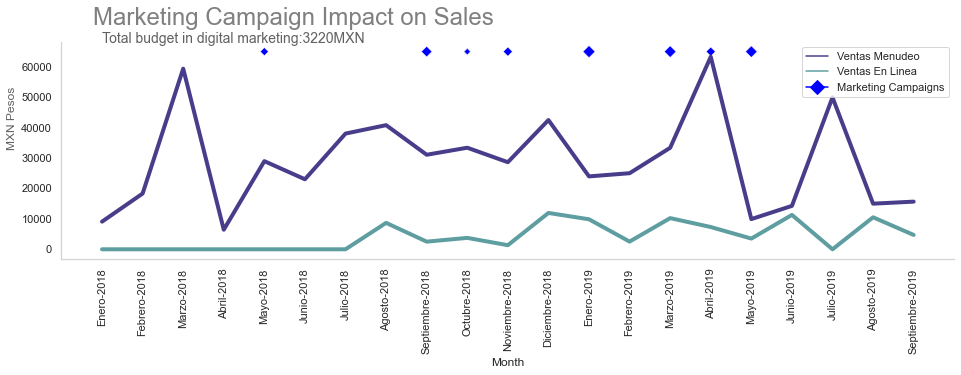

In [66]:
#Plotting
#To activate or deactivate different sale channels remove or type '#' in front of each code line

from matplotlib.lines import Line2D
colors_pres = ['#483D8B','#4169E1','#87CEFA','#808080' ,'#5F9EA0','#6495ED','#ADD8E6','#7B68EE']
y = [65000,65000,65000,65000,65000,65000,65000,65000,65000]
x = month_list
#markersize = markersize_amp

fig = plt.figure(figsize=(16,4))
#fig, ax = plt.subplots(4,1,figsize=(16, 15))
ax = fig.add_subplot(111)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})

#ax = sns.barplot(x="Month", y="Ventas Menudeo", data=df_total_, hue='AÑO', alpha=0.7)
ax = sns.lineplot(x='Month',y=df_total_['Ventas Menudeo'],data=df_total_,lw=4,color=colors_pres[0],ax=ax)
ax = sns.lineplot(x='Month',y=df_total_['Ventas en línea'],data=df_total_,lw=4,color=colors_pres[4],ax=ax)

plt.annotate("Total budget in digital marketing:3220MXN",
             xy=(4,6),xytext=(0,68000),color='#616161',fontsize=14)

#sns.lineplot(x,y,marker='o',markersize=10,color='#000088',ax=ax)
sns.scatterplot(x, y, 
                size=df_marktg['Amount spent (MXN)'].to_list(), marker='D', alpha=1,color='#0000FF')

#plt.axvline(x=4, ymin=0, ymax=0.85, color='#616161', alpha=0.3)
plt.suptitle('Marketing Campaign Impact on Sales',fontsize=24,ha='right',va='top',color='#808080', y=1)
#sns.despine()

# Change the colors of the left and bottom borders (fade into the background)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.ylabel('MXN Pesos',fontsize=12,color='#616161',ha='left',va='bottom')

legend_elements= [Line2D([0], [0], color=colors_pres[0], label='Ventas Menudeo',
                         markersize=10),
                  Line2D([0], [0], color=colors_pres[4], label='Ventas En Linea',
                          markersize=10),
                  Line2D([0], [0], marker='D', color='#0000FF', label='Marketing Campaigns',
                          markerfacecolor='#0000FF', markersize=10),
                   ]
plt.legend(handles=legend_elements)
#ax.get_legend().remove()
#ax.legend(handles=legend_elements)
plt.xticks(rotation='vertical')
plt.show()
fig.savefig('Marktg_impact.png',bbox_inches="tight")
#fig.savefig('Marktg_impact.png')

In [67]:
df_total_

,Month,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,...,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO,Month_num
0,Enero-2018,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,...,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018,1
1,Febrero-2018,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,...,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018,2
2,Marzo-2018,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,...,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667,2018,3
3,Abril-2018,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,...,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018,4
4,Mayo-2018,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,...,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018,5
5,Junio-2018,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,...,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018,6
6,Julio-2018,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,...,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018,7
7,Agosto-2018,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,...,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018,8
8,Septiembre-2018,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,...,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018,9
9,Octubre-2018,30735.00,33401.0,0.0,10623.00,3749.0,162.0,78670.00,6791.00,0.00,...,4119.00,1029.166667,219.00,29.000000,0.00,1036.910000,37194.076667,15584.923333,2018,10


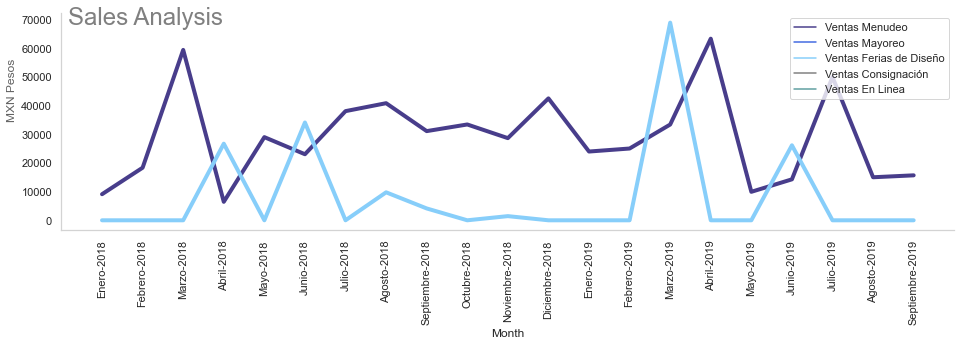

In [65]:
#Repeat plot for slightly different needs 
#To activate or deactivate different sale channels remove or type '#' in front of each code line

from matplotlib.lines import Line2D

fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(111)
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})

colors_pres = ['#483D8B','#4169E1','#87CEFA','#808080' ,'#5F9EA0','#6495ED','#ADD8E6','#7B68EE']


ax = sns.lineplot(x='Month',y=df_total_['Ventas Menudeo'],data=df_total_,lw=4,color=colors_pres[0],ax=ax)
#ax = sns.lineplot(x='Month',y=df_total_['Ventas Mayoreo'],data=df_total_,lw=4,color=colors_pres[1],ax=ax)
ax = sns.lineplot(x='Month',y=df_total_['Ventas Ferias de Diseño'],data=df_total_,lw=4,color=colors_pres[2],ax=ax)
#ax = sns.lineplot(x='Month',y=df_total_['Ventas Consignación'],data=df_total_,lw=4,color=colors_pres[3],ax=ax)
#ax = sns.lineplot(x='Month',y=df_total_['Ventas en línea'],data=df_total_,lw=4,color=colors_pres[4],ax=ax)


plt.title('Sales Analysis                                           ',fontsize=24,ha='right',va='top',color='#808080', y=1)
#sns.despine()

# Change the colors of the left and bottom borders (fade into the background)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.ylabel('MXN Pesos',fontsize=12,color='#616161',ha='left',va='bottom')


legend_elements= [Line2D([0], [0], color=colors_pres[0], label='Ventas Menudeo',
                         markersize=10),
                   Line2D([0], [0], color=colors_pres[1], label='Ventas Mayoreo',
                           markersize=10),
                Line2D([0], [0], color=colors_pres[2], label='Ventas Ferias de Diseño',
                          markersize=10),
                 Line2D([0], [0], color=colors_pres[3], label='Ventas Consignación',
                          markersize=10),
                  Line2D([0], [0], color=colors_pres[4], label='Ventas En Linea',
                          markersize=10)
                 ]


ax.legend(handles=legend_elements)
#ax.get_legend().remove()
#ax.legend(handles=legend_elements)
plt.xticks(rotation='vertical')
plt.show()
fig.savefig('Sales_Analysis_1.png',bbox_inches="tight")


In [57]:
data = df_total_
data

,Month,Ventas Mayoreo,Ventas Menudeo,Ventas Ferias de Diseño,Ventas Consignación,Ventas en línea,Otros Ingresos,TOTAL VENTAS NETAS,Materia Prima,Material de Empaque,...,Gastos de Envío,Bonos,Comisiones y Recargos,Herraminetas Menores y Utensilios,Mantto Herramienta y Utensilios,Maquinas y Equipo Industrial,TOTAL GASTOS OPERATIVOS,UTILIDAD O PÉRDIDA,AÑO,Month_num
0,Enero-2018,10407.00,9090.0,0.0,13056.00,0.0,0.0,32553.00,24704.46,0.00,...,815.00,1029.166667,43.07,409.166667,0.00,0.000000,14538.403333,-25830.043333,2018,1
1,Febrero-2018,0.00,18330.0,0.0,4670.50,0.0,11750.0,34750.50,5077.60,0.00,...,0.00,1029.166667,242.31,608.170000,300.00,0.000000,23389.546667,-1811.776667,2018,2
2,Marzo-2018,34880.00,59392.0,0.0,0.00,0.0,750.0,95022.00,14771.70,2183.45,...,3329.17,1029.166667,975.63,409.166667,360.00,0.000000,31460.733333,30670.416667,2018,3
3,Abril-2018,0.00,6440.0,26702.5,27768.01,0.0,160.0,61070.51,6335.16,390.00,...,0.00,1029.166667,1476.82,0.000000,1100.00,544.833333,37311.890000,5878.340000,2018,4
4,Mayo-2018,34831.84,28984.0,0.0,13464.00,0.0,0.0,77279.84,19588.50,200.00,...,1250.78,1029.166667,103.53,1572.000000,700.00,1036.910000,39469.256667,1048.403333,2018,5
5,Junio-2018,0.00,23026.0,34090.0,14454.00,0.0,0.0,71570.00,3440.68,0.00,...,3538.00,1029.166667,1724.10,178.000000,1512.00,1036.910000,43967.176667,5947.883333,2018,6
6,Julio-2018,28960.00,38051.0,0.0,11343.50,0.0,0.0,78354.50,25877.47,1470.00,...,606.05,1029.166667,987.00,145.500000,400.22,1036.910000,30435.976667,2759.933333,2018,7
7,Agosto-2018,0.00,40818.3,9750.0,3663.00,8693.0,0.0,62924.30,4595.00,0.00,...,2389.14,1029.166667,987.00,0.000000,0.00,1036.910000,36910.216667,-7720.356667,2018,8
8,Septiembre-2018,10140.00,31087.0,4130.0,1209.00,2512.5,470.0,49548.50,4766.07,0.00,...,1680.00,1029.166667,2543.00,1159.000000,900.00,1036.910000,47498.786667,-22555.856667,2018,9
9,Octubre-2018,30735.00,33401.0,0.0,10623.00,3749.0,162.0,78670.00,6791.00,0.00,...,4119.00,1029.166667,219.00,29.000000,0.00,1036.910000,37194.076667,15584.923333,2018,10


In [58]:
colors_pres = ['#483D8B','#4169E1','#87CEFA','#808080' ,'#5F9EA0','#6495ED','#ADD8E6','#7B68EE']

In [59]:
#Trying out plotly with traces

from plotly import graph_objects as go

# TOTAL  VENTAS NETAS
trace0 = go.Line(
            #name = data.Concepto.unique()[0],
            x=data["Month"], #==data.Concepto.unique()[0]]["column_names"],
            y=data["Ventas Mayoreo"], #== data.Concepto.unique()[0]]['value'],
            #offsetgroup=0,
            marker_color = colors_pres[0])

trace1 = go.Line(
            #name = data.Concepto.unique()[0],
            x=data["Month"], #==data.Concepto.unique()[0]]["column_names"],
            y=data["Ventas Menudeo"], #== data.Concepto.unique()[0]]['value'],
            #offsetgroup=0,
            marker_color = colors_pres[1])

trace2 = go.Line(
            #name = data.Concepto.unique()[0],
            x=data["Month"], #==data.Concepto.unique()[0]]["column_names"],
            y=data["Ventas Ferias de Diseño"], #== data.Concepto.unique()[0]]['value'],
            #offsetgroup=0,
            marker_color = colors_pres[2])

trace3 = go.Line(
            #name = data.Concepto.unique()[0],
            x=data["Month"], #==data.Concepto.unique()[0]]["column_names"],
            y=data["Ventas Consignación"], #== data.Concepto.unique()[0]]['value'],
            #offsetgroup=0,
            marker_color = colors_pres[3])

trace4 = go.Line(
            #name = data.Concepto.unique()[0],
            x=data["Month"], #==data.Concepto.unique()[0]]["column_names"],
            y=data["Ventas en línea"], #== data.Concepto.unique()[0]]['value'],
            #offsetgroup=0,
            marker_color = colors_pres[4])

data_ = [trace0,trace1, trace2, trace3, trace4]

fig = go.Figure(data_)

fig.update_layout(
    title='Sales',
    xaxis_title='Mes',
    yaxis_title = 'MXN Pesos',
    
    #Para añadir fondo blanco:
    plot_bgcolor = 'rgba(0,0,0,0)')

fig.show()


